# Finding the Hollywood Formula, Movie Dataset Analysis

### Project Goal: 

What is the movie formula? A statistical analysis approach  to predicting successful movie.

### Stakeholders: 
Movie directors and general public

#### Get all import libraries

In [1]:
import libraries as lib

# Planning 
See planning section of the final_report.py
https://github.com/Movie-Success-Capstone/Movie-Capstone/blob/main/Final/final_report.ipynb

# Data Acquisition

In [2]:
# Call the acquire function & cache the files locally
df = lib.fa.wrangle_df()

Using cached CSV


# Data Preparation

The following preparation process were performed on our dataset:

- 
-
-



In [3]:
# Check for overall nulls

df.isna().any()

title                   False
success                 False
success_rating          False
genres                   True
cast_actor_1            False
cast_actor_2            False
cast_actor_3            False
total_n_cast            False
budget                  False
revenue                 False
profit_amount           False
vote_average            False
vote_count              False
production_companies     True
production_countries     True
overview                False
popularity              False
runtime                 False
profitable              False
release_date            False
release_year            False
imdb_id                 False
production_company       True
is_genre_adventure      False
is_genre_horror         False
is_genre_drama          False
is_genre_scifi          False
is_genre_romance        False
is_genre_thriller       False
is_genre_crime          False
is_genre_comedy         False
is_genre_animation      False
is_genre_action         False
is_genre_m

In [4]:
# Nulls by cols 

lib.fa.nulls_by_col(df)

,percent_cols_missing,id
num_cols_missing,,
3,8.333333333333332,102
2,5.555555555555555,251
1,2.7777777777777777,32
4,11.11111111111111,6
0,0.0,6891


In [5]:
# Nulls by rows 

lib.fa.nulls_by_row(df)

,num_rows_missing,percent_rows_missing
production_company,359.0,4.9
production_companies,359.0,4.9
production_countries,131.0,1.8
genres,15.0,0.2
title,0.0,0.0
is_genre_romance,0.0,0.0
is_genre_adventure,0.0,0.0
is_genre_horror,0.0,0.0
is_genre_drama,0.0,0.0
is_genre_scifi,0.0,0.0


In [24]:
# Dataframe display

df.head(3)


,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary,release_month,release_day,release_weekday,is_long_movie
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop'...,9.026586,98.0,0,1995-12-09,1995,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0,12,9,Saturday,0
6,Judgment Night,0,4.854775,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,8000000.0,12136938.0,4136938.0,6.4,79.0,UniversalPictures Lar...,Japan UnitedStatesofA...,While racing to a box...,5.538671,110.0,0,1993-10-15,1993,tt0107286,UniversalPictures,0,0,0,0,0,1,1,0,0,1,0,0,0,10,15,Friday,1
11,Star Wars,1,285.487448,Adventure Action Scie...,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCe...,UnitedStatesofAmerica,Princess Leia is capt...,42.149697,121.0,1,1977-05-25,1977,tt0076759,Lucasfilm,1,0,0,1,0,0,0,0,0,1,0,0,0,5,25,Wednesday,1


In [22]:
# # split each movie's genre list, then form a set from the unwrapped list of all genres
# categories = set([s for genre_list in df.genres.unique() for s in genre_list.split("|")])

# # one-hot encode each movie's classification
# for cat in categories:
#     df[cat] = df.genres.transform(lambda s: int(cat in s))
# # drop other columns
# df = df[['director_name','genres','duration'] + list(categories)]
# df.head()

In [23]:
# Create time series columns (month, year, day)

# Make release year a datetime format
df.release_date = lib.pd.to_datetime(df.release_date)


# Create columns 
df['release_month'] = df.release_date.dt.month
df['release_day'] = df.release_date.dt.day
df['release_weekday'] = df.release_date.dt.day_name()
df['is_long_movie'] = df.runtime.transform(lambda x: int(x > 100))


### Split the data into train, validate, test

In [29]:
# Spit dataframe into train, validate & test

train, validate, test = lib.fa.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((4077, 40), (1748, 40), (1457, 40))

## Explore

With the project goal in consideration, the project asks the following initial questions to guide our understanding of the features and their correlations. 

### Initial Questions:
- 1.  Is there a relationship between budget and profit?
- 2. What are the top 5 highest voted movies?
- 3. Top 5 highest revenue movies?
- 4. Which top 5 genres have the highest profit?
- 5. Are there production studios that are more likely to succeed than others?
- 6. What are the drivers for less successive movies categories?
- 7. Is there a correlations between runtime for successful movies vs unsuccessful movies
- 8. Are long movies (runtime > 100 min) likely to have more success than short movies 
- 9. Which release months, days are movies likely to be successful?
- 10. Is there a relationship of profit amount with release month and day of the week?
- 11. Correlation heatmap of all features including the target. 


In [146]:
# Set visualizations default colors

bar_color = 'chocolate'
background_color = 'bar_color'

> ## (a). Univariate Exploration

In [147]:
# Target variable mean

print(f'Overall success mean {(train.success.mean()) * 100}')

Overall success mean 37.92003924454256


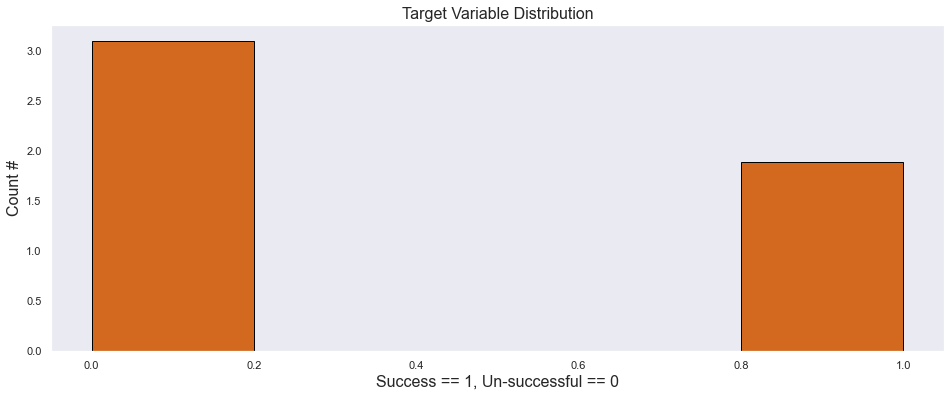

In [239]:
# Target variable 

train.success.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
lib.plt.title('Target Variable Distribution', size = 16)
lib.plt.xlabel('Success == 1, Un-successful == 0', size = 16)
lib.plt.ylabel('Count #', size = 16)
lib.plt.show()


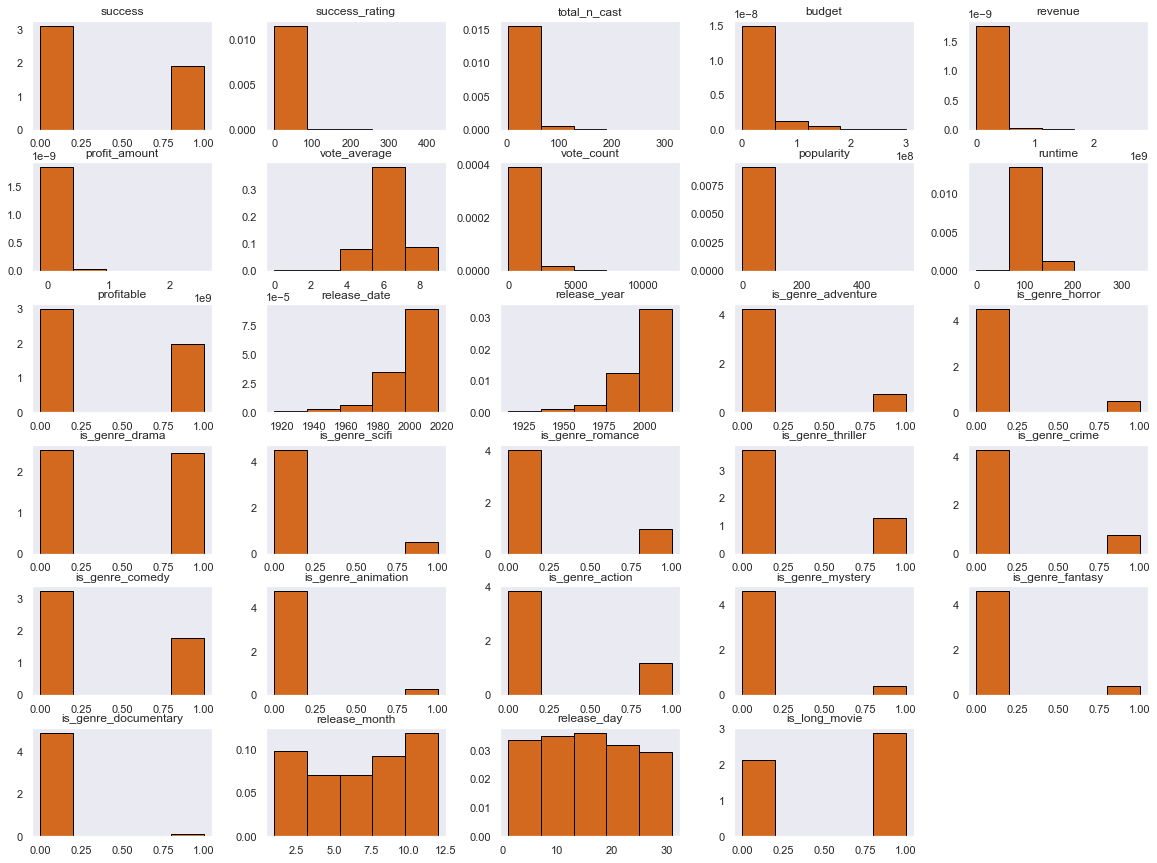

In [149]:
# Other univariate features

train.hist(figsize = (20, 15), grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
lib.plt.show()

In [150]:
# Mean average for all successful movies

success_movies_subset = train[train.success == 1]
success_movies_subset.mean()

success                 1.000000e+00
success_rating          2.098450e+01
total_n_cast            2.612225e+01
budget                  3.213949e+07
revenue                 1.461753e+08
profit_amount           1.140358e+08
vote_average            6.551617e+00
vote_count              1.103046e+03
popularity              1.215681e+01
runtime                 1.124677e+02
profitable              9.793014e-01
release_year            1.997584e+03
is_genre_adventure      1.934023e-01
is_genre_horror         1.080207e-01
is_genre_drama          4.469599e-01
is_genre_scifi          1.073739e-01
is_genre_romance        1.895213e-01
is_genre_thriller       2.619664e-01
is_genre_crime          1.487710e-01
is_genre_comedy         3.525226e-01
is_genre_animation      6.727038e-02
is_genre_action         2.580854e-01
is_genre_mystery        8.408797e-02
is_genre_fantasy        9.637775e-02
is_genre_documentary    1.099612e-02
release_month           6.980595e+00
release_day             1.554722e+01
i

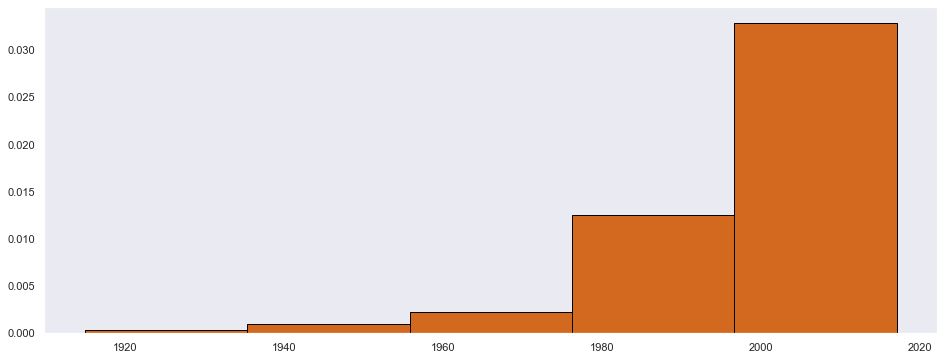

In [151]:
# Overall successful movies overtime

train.release_year.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
lib.plt.show()

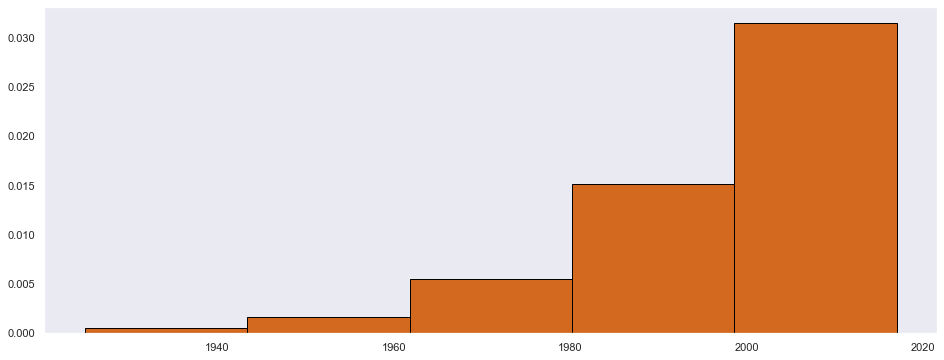

In [152]:
# Successful movies by year

success_movies_subset.release_year.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
lib.plt.show()

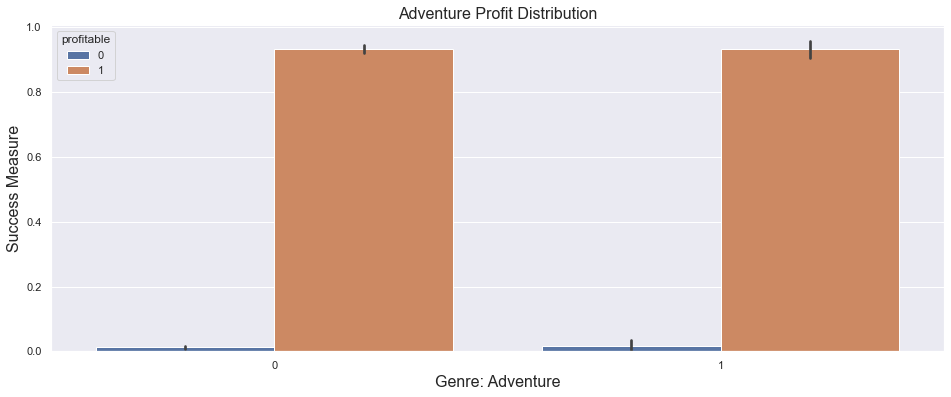

In [153]:
# Profits by adventure genre

ax = lib.sns.barplot(x="is_genre_adventure", 
                     y = 'success', 
                     data=train, 
                     hue = 'profitable')
lib.plt.title('Adventure Profit Distribution', size = 16)
lib.plt.xlabel('Genre: Adventure', size = 16)
lib.plt.ylabel('Success Measure', size = 16)
lib.plt.show()

In [154]:
# Create list of genres

genres_list = ['is_genre_adventure',
              'is_genre_horror',
               'is_genre_drama',
               'is_genre_scifi',
               'is_genre_romance',
               'is_genre_thriller',
               'is_genre_crime',
               'is_genre_comedy',
               'is_genre_animation',
               'is_genre_action',
               'is_genre_mystery',
               'is_genre_fantasy',
               'is_genre_documentary']


### Univariate takeaways

- 38.9% of movies in the dataset succeeded and 61.1% less likely to succeed
- Vote average and runtime appears normally distributed



> ## (b). Bi-variate Exploration

### 1.  Is there a relationship between budget and profit?


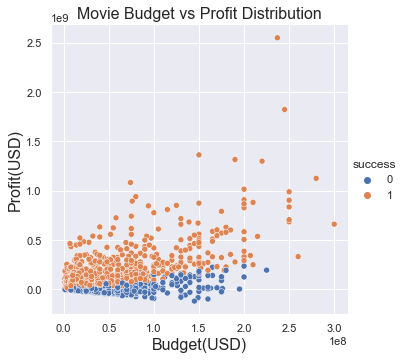

In [155]:
# Budget vs profit relationship

ax = lib.sns.relplot(data = train, 
                x = 'budget', 
                y = 'profit_amount', 
                hue='success')
lib.plt.title('Movie Budget vs Profit Distribution', size = 16)
lib.plt.xlabel('Budget(USD)', size = 16)
lib.plt.ylabel('Profit(USD)', size = 16)
lib.plt.show()

### 2. What are the top 5 highest voted movies?


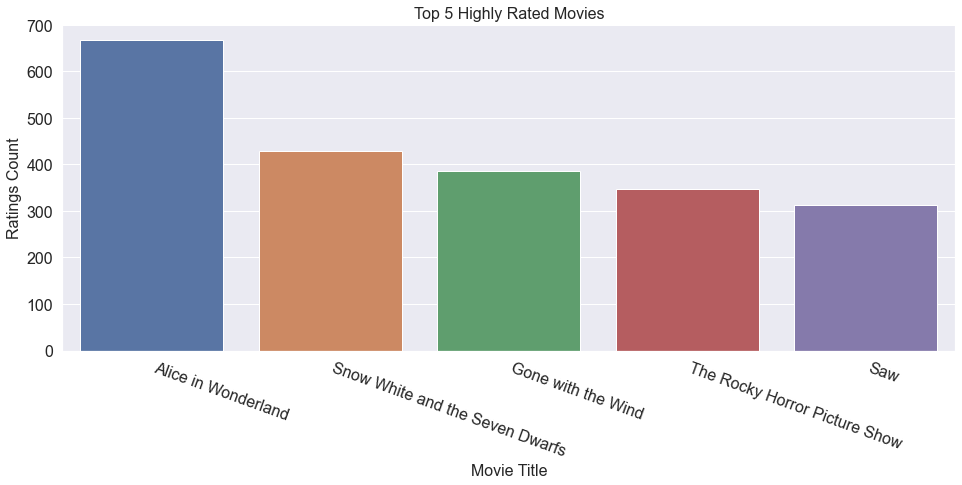

In [156]:
# 5 Highly rated movies

cols = ['title', 'success_rating']
revenue_df = df.sort_values('success_rating', ascending=False)[cols].set_index('title')
top_5 = revenue_df.head(5)
lib.sns.barplot(data = top_5, x = top_5.index, y = 'success_rating');
lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.title('Top 5 Highly Rated Movies', fontsize = 16)
lib.plt.ylabel('Ratings Count', size = 16)
lib.plt.xlabel('Movie Title', size = 16)
lib.plt.show()

In [161]:
# Bottom 5 least voted movies




### 3. Top 5 highest profitable movies?

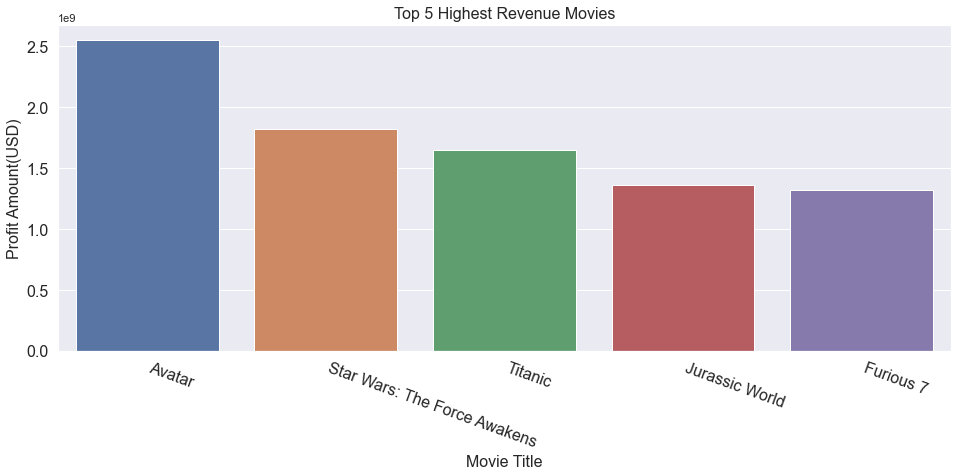

In [145]:
cols = ['title', 'profit_amount']
revenue_df = df.sort_values('profit_amount', ascending=False)[cols].set_index('title')
top_5 = revenue_df.head(5)
lib.sns.barplot(data = top_5, x = top_5.index, y = 'profit_amount');
lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.title('Top 5 Highest Revenue Movies', fontsize = 16)
lib.plt.ylabel('Profit Amount(USD)', size = 16)
lib.plt.xlabel('Movie Title', size = 16)
lib.plt.show()

In [162]:
# Least 5 profitable movies



### 4. Which top 5 genres have the highest profit?


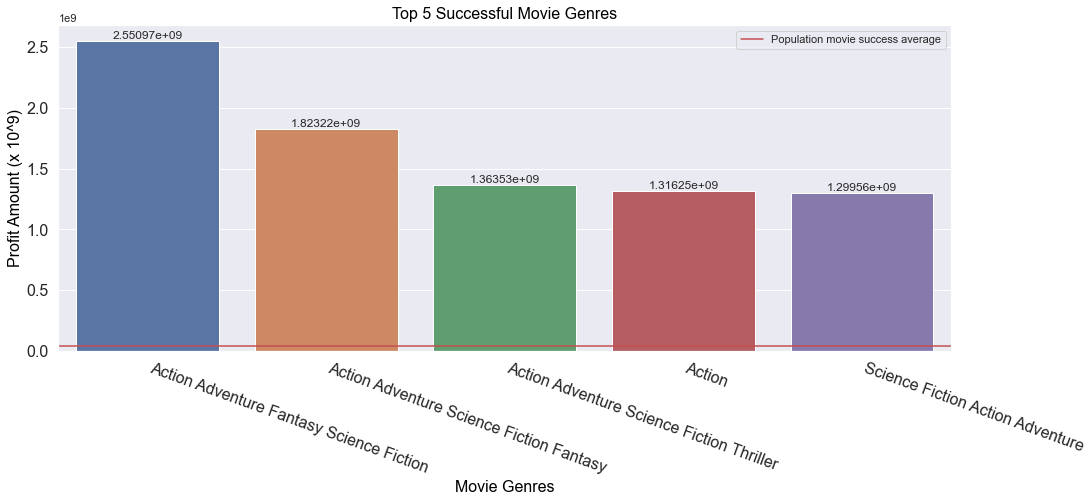

In [169]:
# Create top 5 most profitable subset
top_5_most_profitable_movies = train.nlargest(n = 5, columns = ['profit_amount'])


lib.plt.title('Top 5 Successful Movie Genres', c = 'black', size = 16)
ax = lib.sns.barplot(x = 'genres',  y = 'profit_amount', data = top_5_most_profitable_movies)
ax.bar_label(ax.containers[0])  
overall_movie_profit_mean = df.profit_amount.mean()
lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.axhline(overall_movie_profit_mean, label="Population movie success average", color = 'r')
lib.plt.ylabel('Profit Amount (x 10^9)', c = 'black', size = 16)
lib.plt.xlabel('Movie Genres', c = 'black', size = 16)
lib.plt.legend()
lib.plt.show()

### 5. Are there production studios that are more likely to succeed than others?


### 6. What are the drivers for less successive movies categories?


In [191]:
# Get least successive movie subset

least_successive_movie = train[train.success == 0]

### Bi-variate takeaways

> ## (c). Multi-variate exploration

### 7. Is there a correlations between runtime for successful movies vs unsuccessful movies


In [ ]:
# No discernable relationship between age and fare, but the pclass relates to survival
rel = sns.relplot(x='age', y='fare', data=train, col="runtime", hue="success")
rel.fig.suptitle('Age to Fare, colum by pclass') # One way to title a relplot
plt.tight_layout()


### 8. Are long movies (runtime > 100 min) likely to have more success than short movies 


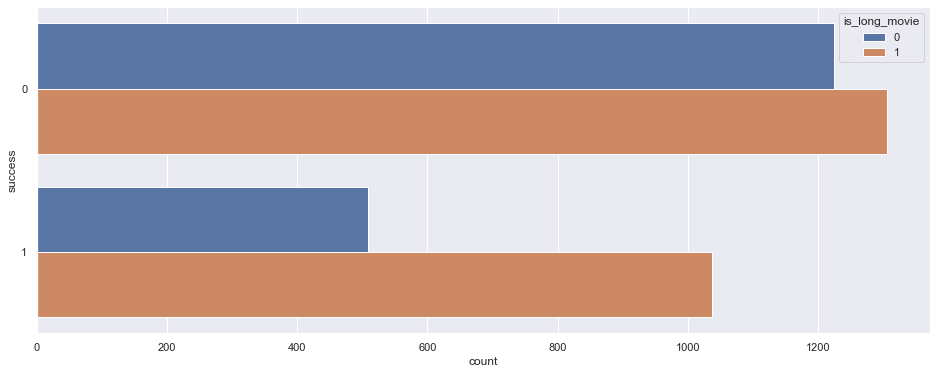

In [186]:
lib.sns.countplot(data = train, y = 'success', hue = 'is_long_movie')
lib.plt.show()

### 9. Which release months, days are movies likely to be successful?


##### (i). Release Month Movie Success 

In [214]:
# Copy df for time series analysis

train_ts_df = train.copy()

# Set release_date as index
train_ts_df = train_ts_df.set_index('release_date').sort_index()

In [215]:
# Examine new dataset format

train_ts_df.head(2)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary,release_month,release_day,release_weekday,is_long_movie
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1915-02-08,The Birth of a Nation,0,4.4,Drama History War,Lillian Gish,Mae Marsh,Henry B. Walthall,49.0,8000000.0,11000000.0,3000000.0,6.4,109.0,EpochFilmCo.,UnitedStatesofAmerica,The Birth of A Nation...,5.113205,193.0,0,1915,tt0004972,EpochFilmCo.,0,0,1,0,0,0,0,0,0,0,0,0,0,2,8,Monday,1
1916-12-24,"20,000 Leagues Under ...",0,3.0,Adventure Drama Actio...,Lois Alexander,Curtis Benton,Wallace Clarke,13.0,8000000.0,8000000.0,0.0,6.0,7.0,TheUniversalFilmMfg.Co.,Bahamas UnitedStateso...,Captain Nemo has buil...,0.917777,105.0,0,1916,tt0006333,TheUniversalFilmMfg.Co.,1,0,1,1,0,0,0,0,0,1,0,0,0,12,24,Sunday,1


In [218]:
# Set target variable

y_target = train_ts_df.success

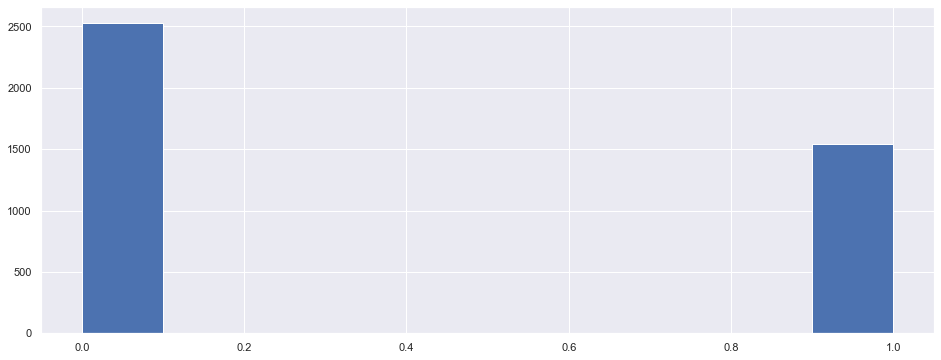

In [220]:
# Visualize target var

y_target.hist()
lib.plt.show()

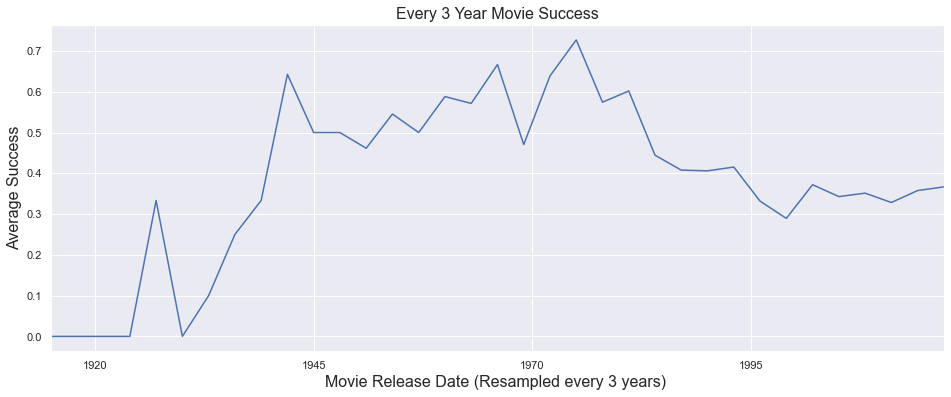

In [231]:
# Success resmapled ever 3 years  for movie set

y_target.resample('3Y').mean().plot(title='2 week average')
lib.plt.title('Every 3 Year Movie Success', size = 16)
lib.plt.ylabel('Average Success', size = 16)
lib.plt.xlabel('Movie Release Date (Resampled every 3 years) ', size = 16)
lib.plt.show()

##### (ii). Release Days Movie Success

### 10. Is there a relationship of profit amount with release month and day of the week?


### 11. Correlation heatmap of all features including the target.

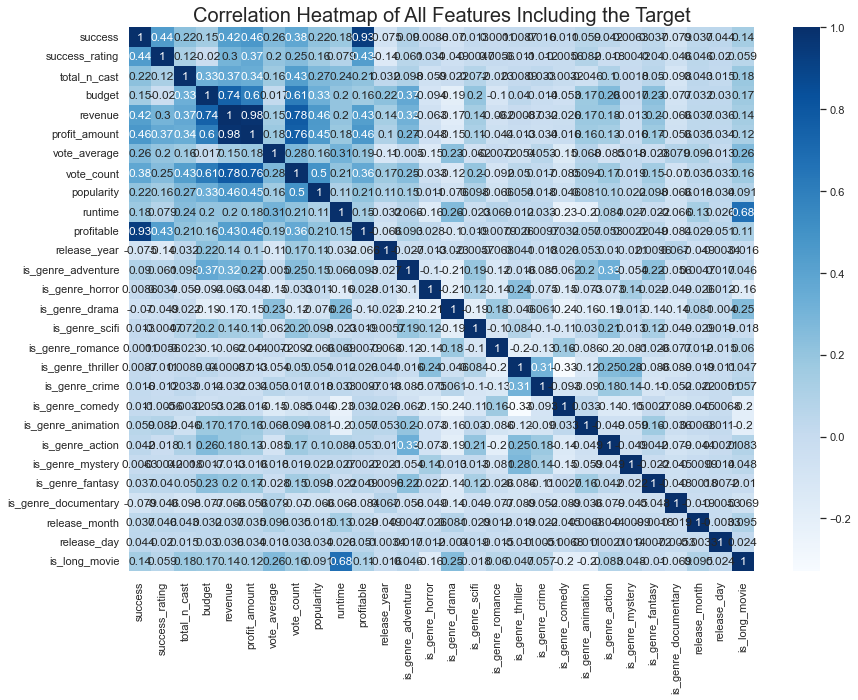

In [182]:
# Heatmap to display correlation of the features and logerror.
lib.plt.figure(figsize=(14, 10))# set up the figure size. 
lib.sns.heatmap(df.corr(), cmap='Blues', annot=True)# set up the heatmap, including color and annot. 
lib.plt.title('Correlation Heatmap of All Features Including the Target', fontsize=20) # set upt the title and front size 
lib.plt.show()

### 12. What movies are long and successful?

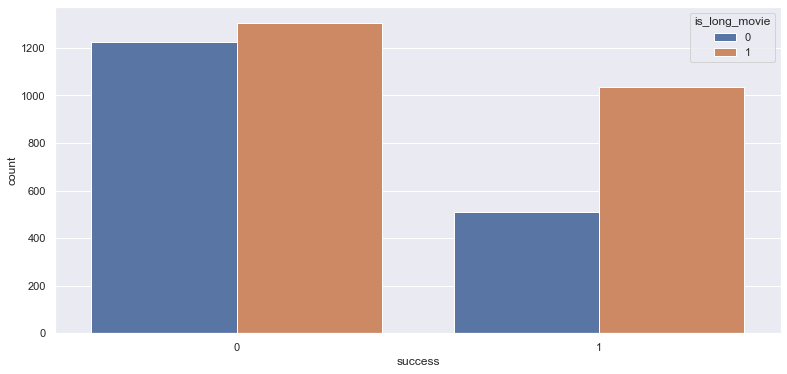

In [41]:
# Movies that are long  

lib.sns.countplot(x='success', hue='is_long_movie',
                data = train);

> ### (d). Time-series analysis

### Multi-variate takeaways

### Exploration Key Takeaways

- Average movie success is 38.9%

-
-
-
-
-


In [83]:
# Create success subset
success_movies = train[train.success == 1]

# Get respective distribution 
success_movies.is_genre_adventure.value_counts()

0    1247
1     299
Name: is_genre_adventure, dtype: int64

In [75]:
success_movies.is_genre_adventure.value_counts()

0    1247
1     299
Name: is_genre_adventure, dtype: int64

## Modeling

## Delivery